# CT normalization

In [2]:
import numpy as np 
import SimpleITK as sitk 
from matplotlib import pyplot as plt

# 读取DICOM文件
dicom_file_path = 'C:/E/CHEN/Data/POPI/4DCT-Dicom/10/10-slice078.dcm'
dicom_image = sitk.ReadImage(dicom_file_path)
dicom_array = sitk.GetArrayFromImage(dicom_image)

In [3]:
sitkImage = sitk.GetImageFromArray(dicom_array)
sitkImage.GetSize()

(512, 512, 1)

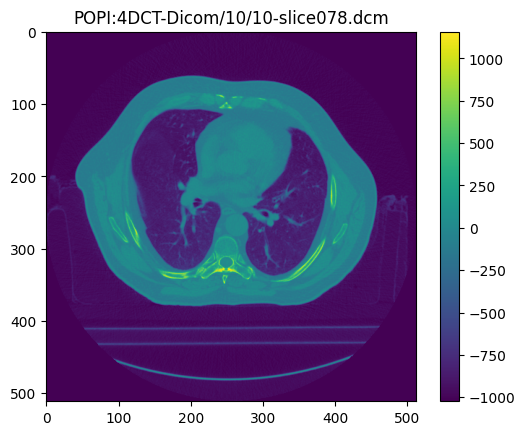

In [10]:
for i in range(dicom_array.shape[0]):
    plt.imshow(dicom_array[i])
    plt.title("POPI:4DCT-Dicom/10/10-slice078.dcm")
    plt.colorbar()
    plt.show()

[[[-1002  -982  -978 ...  -997 -1007 -1012]
  [-1020 -1013  -991 ... -1012 -1009 -1010]
  [-1007 -1015 -1016 ... -1016 -1007 -1005]
  ...
  [ -970  -960  -958 ...  -967  -946  -936]
  [ -990  -954  -942 ...  -970  -966  -951]
  [ -986  -925  -939 ...  -942  -931  -918]]]


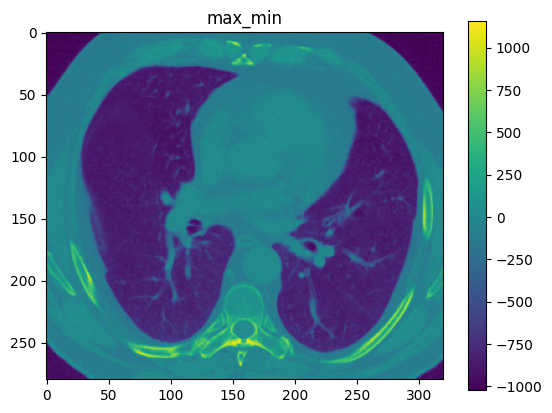

In [6]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# 读取DICOM文件
dicom_file_path = 'C:/E/CHEN/Data/POPI/4DCT-Dicom/10/10-slice078.dcm'
dicom_image = sitk.ReadImage(dicom_file_path)

# 获取图像数据（像素）
dicom_array = sitk.GetArrayFromImage(dicom_image)

# 定义感兴趣区域的坐标范围（左上角和右下角的像素坐标）
x1, y1 = 90, 80  # 左上角坐标
x2, y2 = 410, 360  # 右下角坐标

# 提取感兴趣区域的像素值
roi_pixels = dicom_array[:, y1:y2, x1:x2]
dicom_array = dicom_array[0,  y1:y2, x1:x2]

# 输出感兴趣区域的像素值
print(roi_pixels)
# 显示感兴趣区域
plt.imshow(dicom_array)
plt.title("max_min")
plt.colorbar()
plt.show()

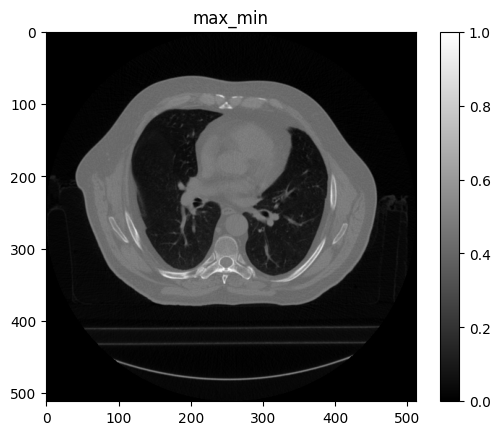

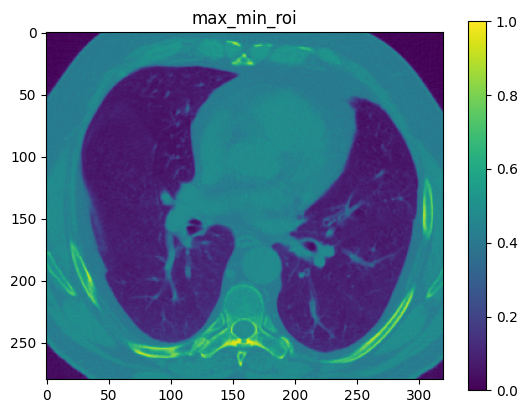

In [12]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# 读取DICOM文件
dicom_file_path = 'C:/E/CHEN/Data/POPI/4DCT-Dicom/10/10-slice078.dcm'
dicom_image = sitk.ReadImage(dicom_file_path)

# 获取图像数据（像素）
dicom_array = sitk.GetArrayFromImage(dicom_image)

max_value = dicom_array.max()
min_value = dicom_array.min()
img_array = (dicom_array - min_value) / (max_value - min_value)
# img_array = img_array * 255
img_array1 = img_array[0, :, :]

# 显示冠状面
plt.imshow(img_array1, cmap='gray')
plt.title("max_min")
plt.colorbar()
plt.show()

# 定义感兴趣区域的坐标范围（左上角和右下角的像素坐标）
x1, y1 = 90, 80  # 左上角坐标
x2, y2 = 410, 360  # 右下角坐标
img_array2 = img_array[0, y1:y2, x1:x2]
# 显示冠状面
plt.imshow(img_array2)
plt.title("max_min_roi")
plt.colorbar()
plt.show()

numpy映射：img_array = np.interp(dicom_array, (dicom_array.min(), dicom_array.max()), (0, 1))

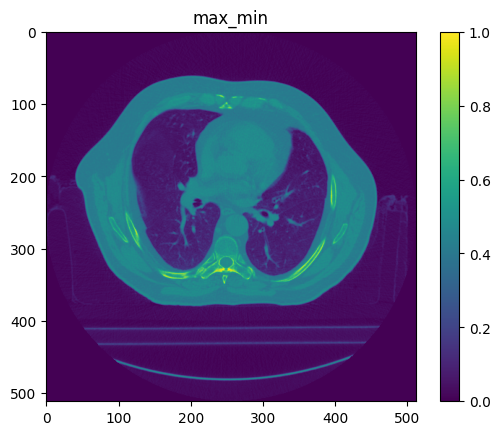

In [26]:
import numpy as np 
import SimpleITK as sitk
import matplotlib.pyplot as plt

# 读取DICOM文件
dicom_file_path = 'C:/E/CHEN/Data/POPI/4DCT-Dicom/00/00-slice078.dcm'
dicom_image = sitk.ReadImage(dicom_file_path)
dicom_array = sitk.GetArrayFromImage(dicom_image)

# max_value = dicom_array.max()
# min_value = dicom_array.min()
# img_array = (dicom_array - min_value) / (max_value - min_value)
# img_array = img_array * 255

img_array = np.interp(dicom_array, (dicom_array.min(), dicom_array.max()), (0, 1))
img_array1 = img_array[0, :, :]

# 显示冠状面
plt.imshow(img_array1)
plt.title("max_min")
plt.colorbar()
plt.show()

# Save Video

In [1]:
import numpy as np 
import SimpleITK as sitk 
from matplotlib import pyplot as plt

# image = sitk.ReadImage('/workspace/SeqX2Y_PyTorch/logs/test_results/000/inhale2_predict.nrrd')
image = sitk.ReadImage('C:\\E\\CHEN\\SeqX2Y_PyTorch\\test\\test_results\\results_LUNA_000\\000\\inhale_mask.nrrd')
ndimage = sitk.GetArrayFromImage(image)

In [7]:
sitkImage = sitk.GetImageFromArray(ndimage)
sitkImage.GetSize()

(128, 128, 128)

In [37]:
# save video 
import cv2

# normalization
max_p = ndimage.max()
min_p = ndimage.min()
Image = (ndimage - min_p) / (max_p - min_p)
# img_array = Image

# img_array = np.interp(dicom_array, (dicom_array.min(), dicom_array.max()), (0, 1))
# normalized_ndimage = np.interp(ndimage, (ndimage.min(), ndimage.max()), (0, 255))

out = cv2.VideoWriter('test.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps=20, frameSize=(128, 128))
# out.write(np.uint8(ndimage))

# 遍历三维数组的每个帧，并将其写入视频
for i in range(Image.shape[0]):
    frame = Image[i, :, :]  # 获取当前帧（二维图像）
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)  # 将灰度图像转换为RGB格式
    out.write(frame)
    # out.write(np.uint8(frame))  # 将当前帧写入视频
out.release()

# Read File

In [15]:
import h5py
 
file_path = 'C:\\E\\CHEN\\Data\\POPI\\Registration\\00-40\\Transform.h5'
file = h5py.File(file_path, 'r')

for key in file.keys():
    print(key)

dataset1 = file['OSName']
dataset2 = file['OSVersion']
dataset3 = file['TransformGroup']

data = dataset1[:]
print(f"DATASET:{data}")
print(dataset2.shape, dataset2.dtype)


# print("Objects in the HDF5 file:")
# for name in f:
#     print(name)
#     for dataset_name in f[name]:
#         dataset = f[name][dataset_name]
#         print(dataset_name, dataset.shape)  # 打印数据集名称和形状
#         # 进一步操作和查看数据集内容
 
file.close()

HDFVersion
ITKVersion
OSName
OSVersion
TransformGroup
DATASET:[b'Windows']
(1,) object
